In [5]:
import numpy as np
import numpy.polynomial as P
import scipy as sp
from matplotlib import pyplot as plt
from tqdm import tqdm
#from sklearn.preprocessing import PolynomialFeatures
from multiprocessing import Pool
import multiprocessing
import ZVnbrosse
from potentials import BananaShape
from zv_cv import Eval_ZVCV
from samplers import MCMC_sampler,Generate_train,ULA_light
from baselines import set_function,construct_ESVM_kernel,GenerateSigma, construct_Tukey_Hanning 
from martingale import approx_q,test_traj
from optimize import Run_eval_test,optimize_parallel_new 
from utils import *
import copy

In [6]:
N_burn = 1*10**4 # Burn in period
N_train = 1*10**5 # Number of samples on which we optimize
#N_test = 2*10**3 # Number of samples
step = 0.1 # Step size
#put 0.5 for MALA
#step = 0.2
n_traj = 100 # Number of independent MCMC trajectories for test
f_type = "sum"
bn = int(np.sqrt(N_train))
W_test = construct_Tukey_Hanning (N_train,bn)

Choose density parameters

In [7]:
d = 2
B = 0.1
M = 10
Cur_pot = BananaShape(B,M,d)

### Generate data

In [8]:
sampler = {"sampler":"RWM","burn_type":"full","main_type":"full"} # Sampling method

if sampler["sampler"] == "ULA":
    res = Generate_train(n_traj, sampler, Cur_pot, step, N_burn, N_train, d)
    res = np.asarray(res)
    traj,traj_grad = res[:,0,:,:],res[:,1,:,:]
else:
    res = Generate_train(n_traj, sampler, Cur_pot, step, N_burn, N_train, d)
    traj = []
    traj_grad = []
    for i in range(len(res)):
        traj.append(res[i][0])
        traj_grad.append(res[i][1])
        print("accepted = ",res[i][2])
    traj = np.asarray(traj)
    traj_grad = np.asarray(traj_grad)

ncores =  4
accepted =  82653
accepted =  83039
accepted =  82782
accepted =  82760
accepted =  82880
accepted =  82778
accepted =  82763
accepted =  83154
accepted =  83004
accepted =  82579
accepted =  82588
accepted =  82333
accepted =  82498
accepted =  82444
accepted =  82900
accepted =  82525
accepted =  82773
accepted =  83015
accepted =  82646
accepted =  82541
accepted =  82693
accepted =  83055
accepted =  82479
accepted =  83047
accepted =  82411
accepted =  82759
accepted =  82316
accepted =  83025
accepted =  82700
accepted =  83242
accepted =  82927
accepted =  82919
accepted =  82825
accepted =  82505
accepted =  83030
accepted =  82999
accepted =  83157
accepted =  82666
accepted =  82421
accepted =  82797
accepted =  82830
accepted =  82764
accepted =  83032
accepted =  82654
accepted =  82452
accepted =  82866
accepted =  82768
accepted =  82606
accepted =  82743
accepted =  82621
accepted =  82816
accepted =  82830
accepted =  82709
accepted =  82719
accepted =  8284

In [9]:
print(traj.shape)
print(traj_grad.shape)
traj_grad = (-1)*traj_grad

(100, 100000, 2)
(100, 100000, 2)


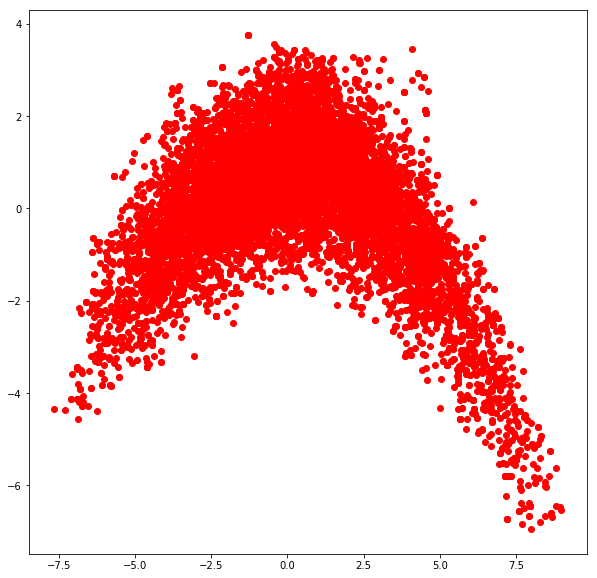

In [12]:
n = 10000
plt.figure(figsize = (10,10))
plt.scatter(traj[0,:n,0],traj[0,:n,1],c='r')
plt.show()

In [99]:
test_seed = 1453
f_type = "sum"
nbcores = multiprocessing.cpu_count()
trav = Pool(nbcores)
res = trav.starmap(Eval_ZVCV, [(traj[i,:,:],traj_grad[i,:,:],f_type,None,W_test) for i in range (n_traj)])
trav.close()

CV1:  [[10.36921777]
 [ 3.7384278 ]
 [ 1.05894424]
 [ 0.87461316]
 [ 1.06259678]
 [ 1.04573168]
 [ 1.05221506]
 [ 0.8707678 ]]
CV1:  [[8.90895085]
 [2.18257149]
 [0.96427489]
 [0.96442366]
 [1.10432288]
 [0.91114853]
 [0.99953077]
 [0.95016529]]
CV1:  [[8.83385507]
 [1.92965421]
 [1.00385104]
 [1.05122754]
 [1.02554756]
 [1.02607112]
 [0.90469973]
 [0.997146  ]]
CV1:  [[9.08239109]
 [2.09940693]
 [1.06959022]
 [0.97038372]
 [1.07444245]
 [1.04918352]
 [0.93603135]
 [1.04105728]]
CV1:  [[9.54068041]
 [2.13958124]
 [1.08590188]
 [0.95111978]
 [1.01994943]
 [1.01606828]
 [0.94640388]
 [0.90320391]]
CV1:  [[9.90913758]
 [3.61517698]
 [0.87885677]
 [1.10187863]
 [1.02976267]
 [1.10776105]
 [1.10572894]
 [1.1548138 ]]
CV1:  [[10.80889999]
 [ 3.87696382]
 [ 0.93780798]
 [ 0.87559243]
 [ 0.89914909]
 [ 1.12201192]
 [ 1.07279797]
 [ 1.00098412]]
CV1:  [[9.29589869]
 [2.46363259]
 [1.08415846]
 [1.02048364]
 [0.85196946]
 [0.96838771]
 [0.99568832]
 [0.82020254]]
CV1:  [[9.5315977 ]
 [2.58334829

In [100]:
res_arr = np.asarray(res)
print(res_arr.shape)

(100, 2, 5)


### Save results

In [101]:
#np.save("banana/rwm_quadratic_15_04.npy",res_arr)
print("Average vr rates:")
print("ZV-1:",np.mean(res_arr[:,1,0]/res_arr[:,1,1]))
print("CV-1:",np.mean(res_arr[:,1,0]/res_arr[:,1,3]))
print("ZV-2:",np.mean(res_arr[:,1,0]/res_arr[:,1,2]))
print("CV-2:",np.mean(res_arr[:,1,0]/res_arr[:,1,4]))

Average vr rates:
ZV-1: 1.484519732086626
CV-1: 1.9805132101990808
ZV-2: 2.8687074593894306
CV-2: 9.565158484276752


### Comparison plots

In [102]:
title = ""
labels = ['Vanilla\n RWM', 'RWM \nwith ZV-1', 'RWM \nwith CV-1']

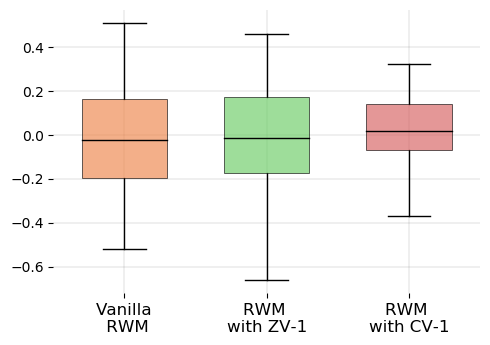

In [103]:
data = [res_arr[:,0,0],res_arr[:,0,1],res_arr[:,0,3]] 
boxplot_ind(data, title, labels, path = "results/banana/rwm_linear_1.pdf")

In [104]:
title = ""
labels = ['Vanilla\n RWM', 'RWM \nwith ZV-2', 'RWM \nwith CV-2']

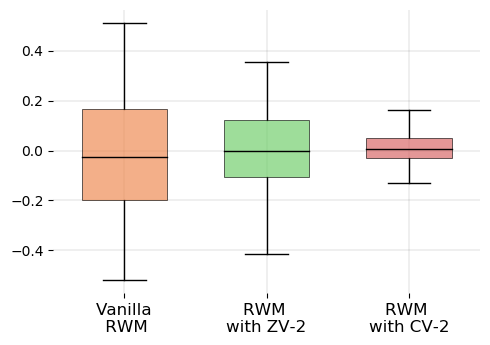

In [105]:
data = [res_arr[:,0,0],res_arr[:,0,2],res_arr[:,0,4]] 
boxplot_ind(data, title, labels, path = "results/banana/rwm_linear_2.pdf")